In [6]:
# Install any packages you may be missing (only needed once)
!pip install tomlkit
!pip install importlib_resources
!pip install matplotlib-label-lines

You should consider upgrading via the '/usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.
     |████████████████████████████████| 57 kB 3.4 MB/s eta 0:00:01
You should consider upgrading via the '/usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.


In [20]:
# Import standard packages
import sys
sys.path.append('../')
from dd_limit_plot import DD_result, find_dd_results
import matplotlib.pyplot as plt

### Load all SI limits, and the neutrino floor

In [21]:
all_wimpsi_limits = find_dd_results("WIMPSI*")
neutrino_floor = DD_result("nufloor_Billardetal_2014_1307.5458.csv")

17 files match your query:
colname, idvname
upper_limit wimp_mass
Loaded 17 files:
CDMSlite spin-independent upper limit
CRESST-III low-mass SI dark-matter search
DAMIC spin-independent upper limit
DarkSide-50 spin-independent upper limit, no quenching fluctuations (conservative)
Projected Darwin spin-independent
LUX SI dark-matter search
Projected LZ spin-independent full exposure, one-sided
2023 tonne-year Spin-independent result from LZ (power-constrained at -1sigma)
Results of Dark Matter Search using the Full PandaX-II Exposure
2021 Spin-independent result from PandaX-4T commisioning run
XENON1T tonne-year SI WIMP limit
Limits using S2-only signals
Limits using S2-only signals and assuming the Migdal effect
Limits using 2-fold S1+S2 signals
Projected XENOnT full exposure, two-sided
2023 tonne-year Spin-independent result from XENONnT (power-constrained at 50%)
Projected DarkSide-20k spin-independent


### Create plot 

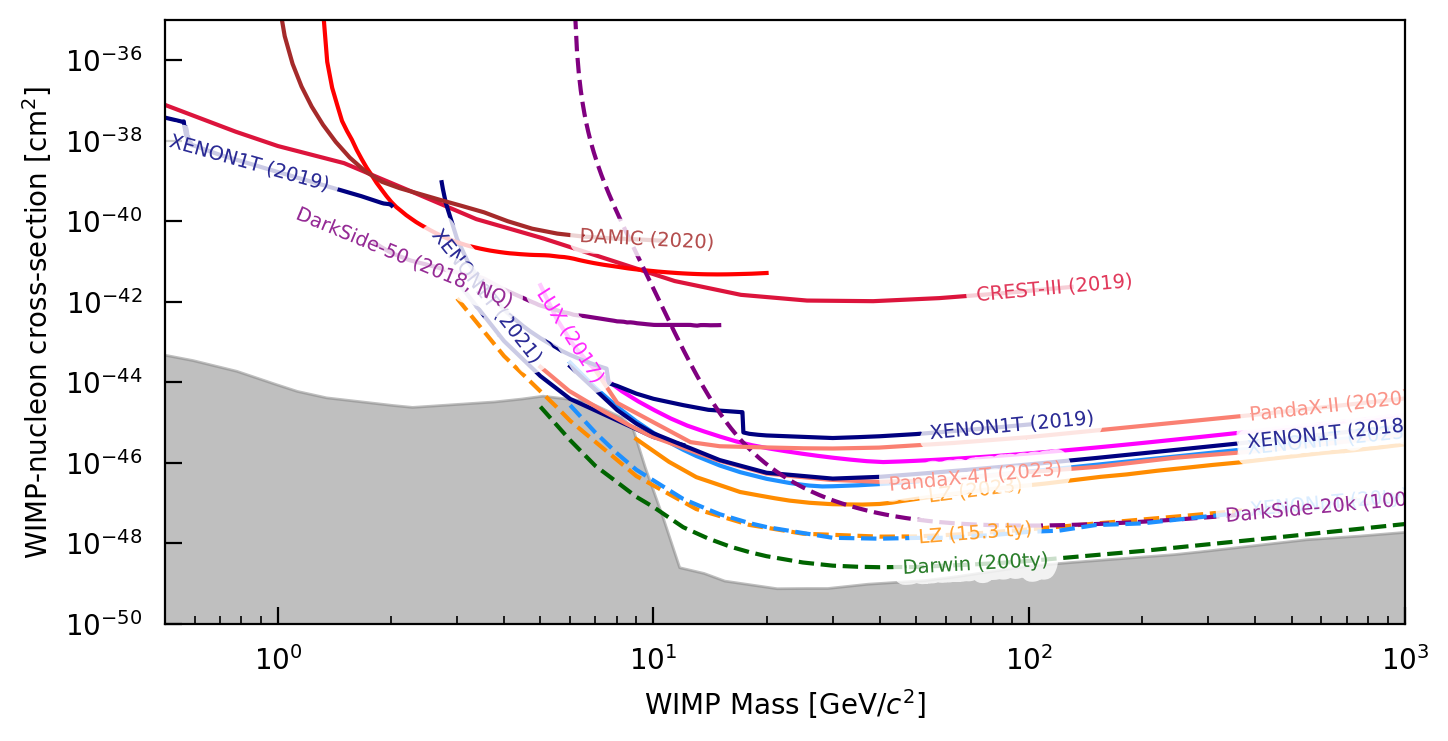

In [22]:
def set_axes():
    #this must be run _before_ the lines are labeled,
    # so that label axes and positions are correctly placed
    plt.xlim([0.5, 1e3])
    plt.ylim([1e-50, 1e-35])
    plt.yscale("log")
    plt.xscale("log")

fig = plt.subplots(figsize=(8,4), dpi=200)

neutrino_floor.plot_band(0., "nufloor", color="gray", alpha=0.5)

for k,i in all_wimpsi_limits.items():
    try:
        i.plot_upper_limit(label=i.label)
    except:
        i.plot_sensitivity(label=i.label)
set_axes()
DD_result.add_line_legends(
    position_overrides = {
        #"WIMPSI_XENON1T_2019_S2onlyupper_limit":3, #here, you can set explicit label positions
        #"WIMPSI_XENON1T_2019_S2onlyMigdalupper_limit":0.2
    },
    size=7,
    xmin = 0.7,xmax=700,
    alpha=0.8
)

# Plot settings
set_axes()
plt.xlabel("WIMP Mass [GeV$/c^2$]")
plt.ylabel("WIMP-nucleon cross-section [cm$^2$]")
visible_ticks = {
   "top": False,
   "right": False
}
plt.gca().tick_params(which='major', direction='in', length=6, pad=8, **visible_ticks)
plt.gca().tick_params(which='minor', direction='in', length=3, pad=8, **visible_ticks)


plt.show()